# Correlation bars of the 3 models WMT budget terms

In [1]:
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
import gcsfs
import numpy as np
import json
from scipy.stats import pearsonr

In [2]:
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

In [4]:
e = pd.read_csv('/home/jovyan/chapter1/ECCO-budgets/ecco_budgt_ind', index_col='time')
ss = pd.read_csv('/home/jovyan/chapter1/SOSE-budgets/sose_budgt_ind', index_col='time')
sd = pd.read_csv('/home/jovyan/chapter1/SODA/soda_budgt_ind', index_col='time')

In [5]:
e

,dvdt,psi,omega*,enso,fw_flx,heat_flx,sam,windstress_curl,ecco_si_index
time,,,,,,,,,
1992-01-15,NaN,NaN,NaN,1.883747,-1.300427,0.001594,-0.122525,-0.219413,-1.225907
1992-02-13,NaN,NaN,NaN,1.786449,-0.869125,-0.867469,-0.885817,1.102549,-0.511387
1992-03-15,NaN,NaN,NaN,1.614739,-2.230632,-1.918516,-0.616002,-0.435378,0.583491
1992-04-14,NaN,NaN,NaN,1.408937,-0.181473,0.300216,0.213964,0.524290,1.208238
1992-05-15,NaN,NaN,NaN,1.166296,-0.546701,0.713055,-1.179878,1.575049,0.788264
...,...,...,...,...,...,...,...,...,...
2015-08-15,NaN,NaN,NaN,2.045500,0.225318,-0.579957,1.083196,-1.076998,0.367270
2015-09-14,NaN,NaN,NaN,2.336527,-0.677235,-0.413434,1.039752,-0.643988,0.661197
2015-10-15,NaN,NaN,NaN,2.599419,0.302553,-0.738937,-0.384399,1.538923,0.638463


In [6]:
#dropping nans so `pearsonr()` can compute corr coeff and p value
e_pearson = e.dropna()
e_pearson

,dvdt,psi,omega*,enso,fw_flx,heat_flx,sam,windstress_curl,ecco_si_index
time,,,,,,,,,
1992-08-15,-2.414014,-8.666480,6.782075,0.260221,-2.574869,0.012807,-0.188814,-0.763010,0.927332
1992-09-14,-2.265353,-8.737757,7.029598,0.077261,0.760027,-0.063608,0.561341,-0.547213,-0.227959
1992-10-15,-1.751334,-8.920366,7.154620,-0.034790,0.036556,0.185561,0.381058,0.407750,0.098085
1992-11-14,-1.582460,-8.883444,7.129749,-0.071677,0.054764,0.383691,0.850674,-1.445354,0.025254
1992-12-15,-1.796267,-8.829289,7.188803,0.055421,2.156626,0.173656,0.239909,-0.289604,-0.294671
...,...,...,...,...,...,...,...,...,...
2015-02-12,-0.080661,-5.118832,4.820833,0.616659,0.362985,-2.202008,2.947096,-1.301247,-0.513505
2015-03-15,0.204915,-4.946699,4.845626,0.713542,-0.839602,-2.640622,0.498413,-0.627343,0.288098
2015-04-14,0.315856,-4.627595,4.926981,0.911939,-0.299702,-0.918089,1.058218,-1.315301,1.641765


In [8]:
ecco = e.corr()
sose = ss.corr()
soda = sd.corr()

In [10]:
ecco

,dvdt,psi,omega*,enso,fw_flx,heat_flx,sam,windstress_curl,ecco_si_index
dvdt,1.000000,0.131564,0.709254,-0.014938,-0.094817,-0.057771,0.052113,0.054426,0.127142
psi,0.131564,1.000000,-0.521685,0.081641,0.071602,0.012859,0.147973,-0.127545,0.015274
omega*,0.709254,-0.521685,1.000000,0.039087,-0.117081,-0.070818,-0.015205,0.104606,0.074965
enso,-0.014938,0.081641,0.039087,1.000000,-0.064801,-0.068467,-0.142116,0.081242,0.024682
fw_flx,-0.094817,0.071602,-0.117081,-0.064801,1.000000,0.105556,0.159329,-0.277577,-0.206017
heat_flx,-0.057771,0.012859,-0.070818,-0.068467,0.105556,1.000000,-0.054843,0.126801,-0.167094
sam,0.052113,0.147973,-0.015205,-0.142116,0.159329,-0.054843,1.000000,-0.613416,-0.044255
windstress_curl,0.054426,-0.127545,0.104606,0.081242,-0.277577,0.126801,-0.613416,1.000000,0.154818
ecco_si_index,0.127142,0.015274,0.074965,0.024682,-0.206017,-0.167094,-0.044255,0.154818,1.000000


In [9]:
#pd.corr() pearson coeff without confidence p value
ecco.iloc[0,1]

0.13156432768459667

In [11]:
dvdt_e = e_pearson.iloc[:,0]
psi_e = e_pearson.iloc[:,1]

In [12]:
#pvalue
pearsonr(dvdt_e, psi_e)[1]

0.029161247088697127

In [13]:
conf_matrix = np.empty_like(ecco)

In [14]:
conf_matrix[0,0] = 1

In [15]:
conf_matrix

array([[1.00000000e+000, 7.74860419e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 3.25060610e-319],
       [7.74681715e-304, 7.74860419e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 3.25060610e-319],
       [7.74681715e-304, 7.74860419e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 3.25060610e-319],
       [0.00000000e+000, 7.74860416e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 7.74860419e-304],
       [0.00000000e+000, 7.74860416e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 7.74860419e-304],
       [0.00000000e+000, 7.74860416e-304, 7.74860419e-304,
        7.74860419e-304, 7.74860419e-304, 7.7486041

In [16]:
e_pearson.iloc[:, 0]

time
1992-08-15   -2.414014
1992-09-14   -2.265353
1992-10-15   -1.751334
1992-11-14   -1.582460
1992-12-15   -1.796267
                ...   
2015-02-12   -0.080661
2015-03-15    0.204915
2015-04-14    0.315856
2015-05-15    0.233578
2015-06-14   -0.100274
Name: dvdt, Length: 275, dtype: float64

In [17]:
e_pearson.iloc[:, 1]

time
1992-08-15   -8.666480
1992-09-14   -8.737757
1992-10-15   -8.920366
1992-11-14   -8.883444
1992-12-15   -8.829289
                ...   
2015-02-12   -5.118832
2015-03-15   -4.946699
2015-04-14   -4.627595
2015-05-15   -4.904746
2015-06-14   -5.285051
Name: psi, Length: 275, dtype: float64

In [18]:
import scipy

In [19]:
scipy.__version__

'1.9.1'

In [20]:
pearsonr(e_pearson.iloc[:, 0], e_pearson.iloc[:, 1]).statistic

0.13156432768459667

In [21]:
test = pearsonr(e_pearson.iloc[:, 0], e_pearson.iloc[:, 1])
test

PearsonRResult(statistic=0.13156432768459667, pvalue=0.029161247088697127)

In [22]:
test[1]

0.029161247088697127

In [23]:
test.confidence_interval()

ConfidenceInterval(low=0.013490308929429356, high=0.24601973538352756)

In [24]:
test.confidence_interval

<bound method PearsonRResult.confidence_interval of PearsonRResult(statistic=0.13156432768459667, pvalue=0.029161247088697127)>

In [25]:
test.confidence_interval(confidence_level=.95)

ConfidenceInterval(low=0.013490308929429356, high=0.24601973538352756)

In [26]:
def confidence_matrix(corr_arr, orig_df):
    """Function to create a matrix populated with Pearson's p-value.
       Input are the corr_arr: pandas df after running `.corr()` to 
       get output matrix the same shape corr matrices; and orig_df: to drop NaNs since 
       `pearsonr()` cannot run with NaNs in df."""
    
    conf_matrix = np.empty_like(corr_arr)
    pearson = orig_df.dropna()
    for i in np.arange(0,len(orig_df.columns)):
        for j in np.arange(0,len(orig_df.columns)): 
            conf_matrix[i, j] = pearsonr(pearson.iloc[:, i], pearson.iloc[:, j])[1]
            
    conf_df = pd.DataFrame(data=conf_matrix)
    conf_df.columns = corr_arr.columns.values
    conf_df.index = corr_arr.columns.values    
    
    return(conf_df)

In [27]:
def confidence_interval_low(corr_arr, orig_df):
    """Function to get lower end of confidence interval"""
    
    conf_matrix = np.empty_like(corr_arr)
    pearson = orig_df.dropna()
    for i in np.arange(0,len(orig_df.columns)):
        for j in np.arange(0,len(orig_df.columns)): 
            conf_matrix[i, j] = pearsonr(pearson.iloc[:, i], pearson.iloc[:, j]).confidence_interval(confidence_level=0.95)[0]
            
    conf_df = pd.DataFrame(data=conf_matrix)
    conf_df.columns = corr_arr.columns.values
    conf_df.index = corr_arr.columns.values    
    
    return(conf_df)

In [28]:
def confidence_interval_high(corr_arr, orig_df):
    """Function to get lower end of confidence interval"""
    
    conf_matrix = np.empty_like(corr_arr)
    pearson = orig_df.dropna()
    for i in np.arange(0,len(orig_df.columns)):
        for j in np.arange(0,len(orig_df.columns)): 
            conf_matrix[i, j] = pearsonr(pearson.iloc[:, i], pearson.iloc[:, j]).confidence_interval(confidence_level=0.95)[1]
            
    conf_df = pd.DataFrame(data=conf_matrix)
    conf_df.columns = corr_arr.columns.values
    conf_df.index = corr_arr.columns.values    
    
    return(conf_df)

In [29]:
ecco_conf = confidence_matrix(ecco, e)
sose_conf = confidence_matrix(sose, ss)
soda_conf = confidence_matrix(soda, sd)

In [30]:
ecco_conf_low = confidence_interval_low(ecco, e)
sose_conf_low = confidence_interval_low(sose, ss)
soda_conf_low = confidence_interval_low(soda, sd)

In [31]:
ecco_conf_high = confidence_interval_high(ecco, e)
sose_conf_high = confidence_interval_high(sose, ss)
soda_conf_high = confidence_interval_high(soda, sd)

## Below are the matrices for correlation, p value, low and high confidence interval boundaries

### ECCO

In [32]:
ecco

,dvdt,psi,omega*,enso,fw_flx,heat_flx,sam,windstress_curl,ecco_si_index
dvdt,1.000000,0.131564,0.709254,-0.014938,-0.094817,-0.057771,0.052113,0.054426,0.127142
psi,0.131564,1.000000,-0.521685,0.081641,0.071602,0.012859,0.147973,-0.127545,0.015274
omega*,0.709254,-0.521685,1.000000,0.039087,-0.117081,-0.070818,-0.015205,0.104606,0.074965
enso,-0.014938,0.081641,0.039087,1.000000,-0.064801,-0.068467,-0.142116,0.081242,0.024682
fw_flx,-0.094817,0.071602,-0.117081,-0.064801,1.000000,0.105556,0.159329,-0.277577,-0.206017
heat_flx,-0.057771,0.012859,-0.070818,-0.068467,0.105556,1.000000,-0.054843,0.126801,-0.167094
sam,0.052113,0.147973,-0.015205,-0.142116,0.159329,-0.054843,1.000000,-0.613416,-0.044255
windstress_curl,0.054426,-0.127545,0.104606,0.081242,-0.277577,0.126801,-0.613416,1.000000,0.154818
ecco_si_index,0.127142,0.015274,0.074965,0.024682,-0.206017,-0.167094,-0.044255,0.154818,1.000000


In [33]:
ecco_conf

,dvdt,psi,omega*,enso,fw_flx,heat_flx,sam,windstress_curl,ecco_si_index
dvdt,0.000000e+00,2.916125e-02,2.392464e-43,0.805209,0.116708,0.339855,3.893194e-01,3.685990e-01,0.035086
psi,2.916125e-02,0.000000e+00,1.349699e-20,0.177032,0.236613,0.831895,1.404121e-02,3.450591e-02,0.800923
omega*,2.392464e-43,1.349699e-20,0.000000e+00,0.518615,0.052452,0.241798,8.018029e-01,8.335395e-02,0.215261
enso,8.052093e-01,1.770315e-01,5.186149e-01,0.000000,0.347897,0.079050,1.113396e-02,1.178338e-01,0.674230
fw_flx,1.167085e-01,2.366135e-01,5.245239e-02,0.347897,0.000000,0.221785,3.788935e-02,2.779393e-06,0.001967
heat_flx,3.398554e-01,8.318948e-01,2.417977e-01,0.079050,0.221785,0.000000,3.043500e-01,4.291539e-02,0.048132
sam,3.893194e-01,1.404121e-02,8.018029e-01,0.011134,0.037889,0.304350,0.000000e+00,5.723323e-29,0.560812
windstress_curl,3.685990e-01,3.450591e-02,8.335395e-02,0.117834,0.000003,0.042915,5.723323e-29,0.000000e+00,0.004640
ecco_si_index,3.508554e-02,8.009231e-01,2.152605e-01,0.674230,0.001967,0.048132,5.608119e-01,4.640016e-03,0.000000


In [34]:
ecco_conf_low

,dvdt,psi,omega*,enso,fw_flx,heat_flx,sam,windstress_curl,ecco_si_index
dvdt,1.000000,0.013490,0.645089,-0.132987,-0.210738,-0.174860,-0.066581,-0.064272,0.008993
psi,0.013490,1.000000,-0.602773,-0.037000,-0.047081,-0.105586,0.030218,-0.242176,-0.103196
omega*,0.645089,-0.602773,1.000000,-0.079565,-0.232150,-0.187531,-0.133249,-0.013849,-0.043707
enso,-0.132987,-0.037000,-0.079565,1.000000,-0.173932,-0.221592,-0.266339,-0.024025,-0.093104
fw_flx,-0.210738,-0.047081,-0.232150,-0.173932,1.000000,-0.044762,0.007089,-0.383919,-0.297602
heat_flx,-0.174860,-0.105586,-0.187531,-0.221592,-0.044762,1.000000,-0.179130,0.003956,-0.234265
sam,-0.066581,0.030218,-0.133249,-0.266339,0.007089,-0.179130,1.000000,-0.675916,-0.152871
windstress_curl,-0.064272,-0.242176,-0.013849,-0.024025,-0.383919,0.003956,-0.675916,1.000000,0.053028
ecco_si_index,0.008993,-0.103196,-0.043707,-0.093104,-0.297602,-0.234265,-0.152871,0.053028,1.000000


In [35]:
ecco_conf_high

,dvdt,psi,omega*,enso,fw_flx,heat_flx,sam,windstress_curl,ecco_si_index
dvdt,1.000000,0.246020,0.763486,0.103528,0.023733,0.060930,0.169353,0.171605,0.241790
psi,0.246020,1.000000,-0.429931,0.198013,0.188291,0.130943,0.261677,-0.009403,0.133317
omega*,0.763486,-0.429931,1.000000,0.156647,0.001220,0.047867,0.103265,0.220166,0.191550
enso,0.103528,0.198013,0.156647,1.000000,0.061883,0.012351,-0.035224,0.210459,0.143312
fw_flx,0.023733,0.188291,0.001220,0.061883,1.000000,0.190531,0.239995,-0.165433,-0.069095
heat_flx,0.060930,0.130943,0.047867,0.012351,0.190531,1.000000,0.056537,0.237041,-0.001017
sam,0.169353,0.261677,0.103265,-0.035224,0.239995,0.056537,1.000000,-0.525477,0.083408
windstress_curl,0.171605,-0.009403,0.220166,0.210459,-0.165433,0.237041,-0.525477,1.000000,0.282833
ecco_si_index,0.241790,0.133317,0.191550,0.143312,-0.069095,-0.001017,0.083408,0.282833,1.000000


### SOSE

In [49]:
sose

,dvdt,psi,omega*,enso,fw_flx,heat_flx,sam,sose,windstress_curl
dvdt,1.000000,-0.721784,0.936791,-0.104923,-0.032755,-0.059553,-0.051311,-0.397497,0.059854
psi,-0.721784,1.000000,-0.912713,-0.080665,0.051883,0.087316,0.161069,0.669263,-0.333050
omega*,0.936791,-0.912713,1.000000,-0.056596,-0.039667,-0.080526,-0.101374,-0.557542,0.189614
enso,-0.104923,-0.080665,-0.056596,1.000000,-0.050652,0.080254,-0.283055,-0.037990,0.276552
fw_flx,-0.032755,0.051883,-0.039667,-0.050652,1.000000,-0.203783,-0.238027,0.053914,0.017578
heat_flx,-0.059553,0.087316,-0.080526,0.080254,-0.203783,1.000000,0.044157,0.052403,0.047809
sam,-0.051311,0.161069,-0.101374,-0.283055,-0.238027,0.044157,1.000000,-0.005067,-0.589282
sose,-0.397497,0.669263,-0.557542,-0.037990,0.053914,0.052403,-0.005067,1.000000,-0.117696
windstress_curl,0.059854,-0.333050,0.189614,0.276552,0.017578,0.047809,-0.589282,-0.117696,1.000000


In [29]:
sose_conf

,dvdt,psi,omega*,enso,fw_flx,heat_flx,sam,sose,windstress_curl
dvdt,0.000000e+00,7.655631e-11,3.924564e-28,0.424964,0.803790,0.651275,6.970156e-01,1.661389e-03,6.496276e-01
psi,7.655631e-11,0.000000e+00,3.250525e-24,0.540086,0.693807,0.507084,2.189093e-01,5.040206e-09,9.316331e-03
omega*,3.924564e-28,3.250525e-24,0.000000e+00,0.667549,0.763479,0.540785,4.408802e-01,3.700918e-06,1.467655e-01
enso,4.249636e-01,5.400863e-01,6.675494e-01,0.000000,0.700722,0.542157,2.841999e-02,7.732062e-01,3.243483e-02
fw_flx,8.037901e-01,6.938065e-01,7.634785e-01,0.700722,0.000000,0.118352,6.704334e-02,6.824466e-01,8.939524e-01
heat_flx,6.512747e-01,5.070840e-01,5.407852e-01,0.542157,0.118352,0.000000,7.376225e-01,6.908890e-01,7.167976e-01
sam,6.970156e-01,2.189093e-01,4.408802e-01,0.028420,0.067043,0.737622,0.000000e+00,9.693513e-01,7.293241e-07
sose,1.661389e-03,5.040206e-09,3.700918e-06,0.773206,0.682447,0.690889,9.693513e-01,0.000000e+00,3.704618e-01
windstress_curl,6.496276e-01,9.316331e-03,1.467655e-01,0.032435,0.893952,0.716798,7.293241e-07,3.704618e-01,0.000000e+00


In [44]:
sose_conf_low

,dvdt,psi,omega*,enso,fw_flx,heat_flx,sam,sose,windstress_curl
dvdt,1.000000,-0.824581,0.896001,-0.349535,-0.284315,-0.308808,-0.301310,-0.591699,-0.197066
psi,-0.824581,1.000000,-0.947130,-0.327874,-0.204739,-0.170387,-0.096816,0.500373,-0.541205
omega*,0.896001,-0.947130,1.000000,-0.306121,-0.290664,-0.327749,-0.346382,-0.710831,-0.067563
enso,-0.349535,-0.327874,-0.306121,1.000000,-0.300709,-0.177283,-0.500972,-0.289126,0.024336
fw_flx,-0.284315,-0.204739,-0.290664,-0.300709,1.000000,-0.435188,-0.463912,-0.202787,-0.237406
heat_flx,-0.308808,-0.170387,-0.327749,-0.177283,-0.435188,1.000000,-0.212147,-0.204239,-0.208649
sam,-0.301310,-0.096816,-0.346382,-0.500972,-0.463912,-0.212147,1.000000,-0.258659,-0.733457
sose,-0.591699,0.500373,-0.710831,-0.289126,-0.202787,-0.204239,-0.258659,1.000000,-0.360837
windstress_curl,-0.197066,-0.541205,-0.067563,0.024336,-0.237406,-0.208649,-0.733457,-0.360837,1.000000


In [53]:
sose_conf_high

,dvdt,psi,omega*,enso,fw_flx,heat_flx,sam,sose,windstress_curl
dvdt,1.000000,-0.572851,0.961903,0.153080,0.223025,0.197356,0.205288,-0.159691,0.309081
psi,-0.572851,1.000000,-0.857530,0.176883,0.301831,0.333839,0.398687,0.789088,-0.086435
omega*,0.961903,-0.857530,1.000000,0.200206,0.216438,0.177018,0.156582,-0.353690,0.423165
enso,0.153080,0.176883,0.200206,1.000000,0.205921,0.327505,-0.031386,0.218038,0.495669
fw_flx,0.223025,0.301831,0.216438,0.205921,1.000000,0.052878,0.016920,0.303681,0.270296
heat_flx,0.197356,0.333839,0.177018,0.327505,0.052878,1.000000,0.294776,0.302305,0.298114
sam,0.205288,0.398687,0.156582,-0.031386,0.016920,0.294776,1.000000,0.249178,-0.394368
sose,-0.159691,0.789088,-0.353690,0.218038,0.303681,0.302305,0.249178,1.000000,0.140426
windstress_curl,0.309081,-0.086435,0.423165,0.495669,0.270296,0.298114,-0.394368,0.140426,1.000000


In [72]:
-0.912713 - -0.947130

0.03441700000000003

### SODA

In [50]:
soda

,dvdt,psi,omega,soda,enso,sam
dvdt,1.000000,-0.118190,0.972394,-0.185393,-0.175301,0.051816
psi,-0.118190,1.000000,-0.346638,0.448088,0.277924,0.059293
omega,0.972394,-0.346638,1.000000,-0.280423,-0.230903,0.035012
soda,-0.185393,0.448088,-0.280423,1.000000,0.075641,0.005624
enso,-0.175301,0.277924,-0.230903,0.075641,1.000000,-0.083650
sam,0.051816,0.059293,0.035012,0.005624,-0.083650,1.000000


In [30]:
soda_conf

,dvdt,psi,omega,soda,enso,sam
dvdt,0.000000e+00,5.511396e-02,1.320519e-167,2.492574e-03,0.004277,0.401766
psi,5.511396e-02,0.000000e+00,7.214370e-09,1.922015e-14,0.000005,0.337218
omega,1.320519e-167,7.214370e-09,0.000000e+00,3.693703e-06,0.000154,0.571150
soda,2.492574e-03,1.922015e-14,3.693703e-06,0.000000e+00,0.209311,0.692234
enso,4.277407e-03,4.540906e-06,1.535806e-04,2.093111e-01,0.000000,0.402955
sam,4.017659e-01,3.372183e-01,5.711496e-01,6.922337e-01,0.402955,0.000000


In [46]:
soda_conf_low

,dvdt,psi,omega,soda,enso,sam
dvdt,1.000000,-0.235556,0.964946,-0.299418,-0.289893,-0.069345
psi,-0.235556,1.000000,-0.448592,0.346083,0.162655,-0.061877
omega,0.964946,-0.448592,1.000000,-0.388014,-0.342094,-0.086078
soda,-0.299418,0.346083,-0.388014,1.000000,-0.043615,-0.096538
enso,-0.289893,0.162655,-0.342094,-0.043615,1.000000,-0.171343
sam,-0.069345,-0.061877,-0.086078,-0.096538,-0.171343,1.000000


In [54]:
soda_conf_high

,dvdt,psi,omega,soda,enso,sam
dvdt,1.000000,0.002574,0.978277,-0.066146,-0.055754,0.171470
psi,0.002574,1.000000,-0.235778,0.539624,0.385709,0.178741
omega,0.978277,-0.235778,1.000000,-0.165292,-0.113336,0.155084
soda,-0.066146,0.539624,-0.165292,1.000000,0.196409,0.144773
enso,-0.055754,0.385709,-0.113336,0.196409,1.000000,0.069476
sam,0.171470,0.178741,0.155084,0.144773,0.069476,1.000000


In [84]:
-0.346638 - -0.448592	

0.10195399999999999

In [36]:
soda.iloc[:, :3]

,dvdt,psi,omega
dvdt,1.000000,0.004045,0.986644
psi,0.004045,1.000000,-0.158899
omega,0.986644,-0.158899,1.000000
soda,-0.014079,-0.493681,0.066516
enso,-0.263271,-0.053542,-0.251208
sam,-0.018971,-0.158910,0.007153
windstress_curl,0.090341,0.076536,0.077818


In [37]:
soda.iloc[2, 1]

-0.15889907037395656

### Correlation bargraphs

In [38]:
ecco_dvdt_psi = ecco.iloc[0, 1]
ecco_dvdt_omega = ecco.iloc[0, 2]
ecco_psi_omega = ecco.iloc[2, 1]

sose_dvdt_psi = sose.iloc[0, 1]
sose_dvdt_omega = sose.iloc[0, 2]
sose_psi_omega = sose.iloc[2, 1]

soda_dvdt_psi = soda.iloc[0, 1]
soda_dvdt_omega = soda.iloc[0, 2]
soda_psi_omega = soda.iloc[2, 1]

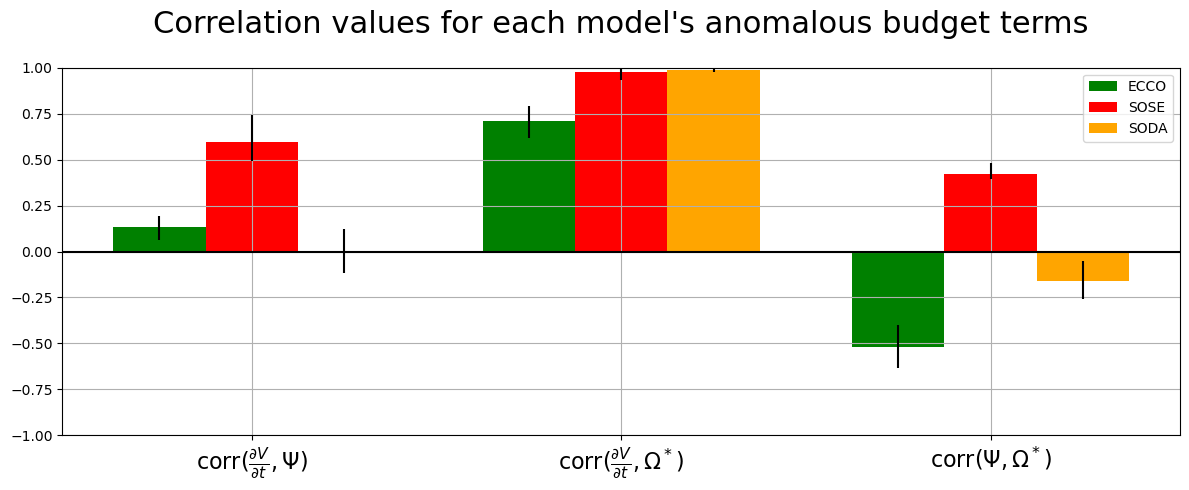

In [39]:
fig, ax = plt.subplots(1,1, figsize=(12,5))

data = [[ecco_dvdt_psi, ecco_dvdt_omega, ecco_psi_omega],
        [sose_dvdt_psi, sose_dvdt_omega, sose_psi_omega],
        [soda_dvdt_psi, soda_dvdt_omega, soda_psi_omega]]
X = np.arange(3)

yerr_ecco = np.array([[0.07, 0.09, 0.11], [0.06, 0.08, 0.12]])
yerr_sose = np.array([[0.1, 0.04, 0.03], [0.15, 0.03, 0.06]])
yerr_soda = np.array([[0.12, 0.01, 0.1], [0.12, 0.01, 0.11]])

ax.bar(X + 0.00, data[0], color = 'g', width = 0.25, label='ECCO', yerr=yerr_ecco)
ax.bar(X + 0.25, data[1], color = 'r', width = 0.25, label='SOSE', yerr=yerr_sose)
ax.bar(X + 0.50, data[2], color = 'orange', width = 0.25, label='SODA', yerr=yerr_soda)



ax.axhline(y=0, color='k')
ticks = [r"corr($\frac{\partial V}{\partial t},\Psi$)", 
         r"corr($\frac{\partial V}{\partial t},\Omega^*$)", 
         r"corr($\Psi,\Omega^*$)"]
ax.set_xticks(X + 0.25)
ax.set_xticklabels(ticks, fontsize=16)
ax.set_title("Correlation values for each model's anomalous budget terms", fontsize=22, pad=25)
ax.set_ylabel('')
ax.grid()
ax.set_ylim(-1,1)
plt.tight_layout()
plt.legend(loc='best')
#plt.savefig('corr-bars.pdf');

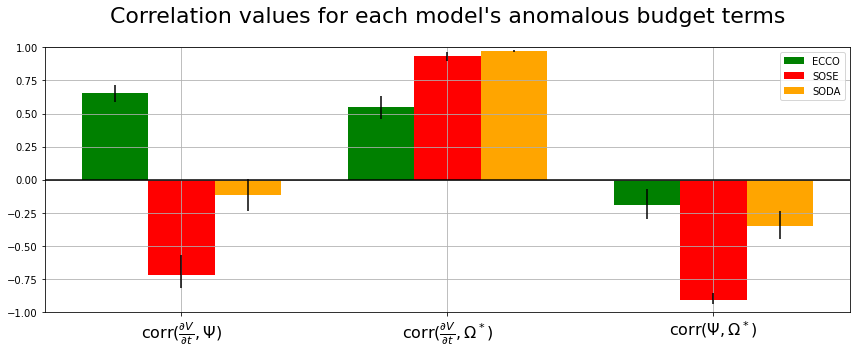

In [87]:
fig, ax = plt.subplots(1,1, figsize=(12,5))

data = [[ecco_dvdt_psi, ecco_dvdt_omega, ecco_psi_omega],
        [sose_dvdt_psi, sose_dvdt_omega, sose_psi_omega],
        [soda_dvdt_psi, soda_dvdt_omega, soda_psi_omega]]
X = np.arange(3)

yerr_ecco = np.array([[0.07, 0.09, 0.11], [0.06, 0.08, 0.12]])
yerr_sose = np.array([[0.1, 0.04, 0.03], [0.15, 0.03, 0.06]])
yerr_soda = np.array([[0.12, 0.01, 0.1], [0.12, 0.01, 0.11]])

ax.bar(X + 0.00, data[0], color = 'g', width = 0.25, label='ECCO', yerr=yerr_ecco)
ax.bar(X + 0.25, data[1], color = 'r', width = 0.25, label='SOSE', yerr=yerr_sose)
ax.bar(X + 0.50, data[2], color = 'orange', width = 0.25, label='SODA', yerr=yerr_soda)



ax.axhline(y=0, color='k')
ticks = [r"corr($\frac{\partial V}{\partial t},\Psi$)", 
         r"corr($\frac{\partial V}{\partial t},\Omega^*$)", 
         r"corr($\Psi,\Omega^*$)"]
ax.set_xticks(X + 0.25)
ax.set_xticklabels(ticks, fontsize=16)
ax.set_title("Correlation values for each model's anomalous budget terms", fontsize=22, pad=25)
ax.set_ylabel('')
ax.grid()
ax.set_ylim(-1,1)
plt.tight_layout()
plt.legend(loc='best')
plt.savefig('corr-bars.pdf');

In [11]:
soda_dvdt_omega

0.9723936658240443

In [12]:
soda_dvdt_psi

-0.11819008489937648

In [13]:
soda_psi_omega

-0.346638197010356